# Lab 08 : The Poisson Equation

In this lab we will examine system the Poisson equation. In electrodynamic and gravitational systems, we often encounter this equation, and wish to compute the gravitational or electromagnetic potential given a mass or charge distribution described by $\rho$.
Here we will consider this equation in two dimensions,

$$ \nabla^2 \phi(x,y) = \rho(x, y)\,. $$

We will be interested in computing the discrete Fourier transform of this equation, and manipulating it to solve for $\phi$.
We have seen that the conjugate variable of a timeseries is the frequency, i.e. when we have a time-dependent function in configuration space, the variable we work with in Fourier space is the frequency, $t \leftrightarrow \nu$. For spatial data, the conjugate variable is often referred to as the *wavevector*, which we will denote $k$. In two dimensions, we will have two conjugate variables, $x \leftrightarrow k_x$ and $y \leftrightarrow k_y$, and a corresponding wavevector $\vec{k} = (k_x, k_y)$.

In terms of these quantities, the Fourier transform of the Poisson equation gives us the following equation,

$$ -|2\pi\vec{k}|^2 \tilde{\phi}(k_x,k_y) = \tilde{\rho}(k_x, k_y)\,. $$

We can then solve for $\tilde{\phi}$ by dividing both sides of this equation by $-|2\pi\vec{k}|^2$, and take an inverse Fourier transform to compute $\phi$.

## Initialization

As always, include any initialization below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Fourier transforms in two dimensions

We will begin by looking at a sinusoidal charge/matter density field in two dimensions,

$$\rho(x, y) = \sin(4\pi x) \sin (8\pi y)\,.$$

Below, generate an $N x N$ array containing values of $\rho$ sampled in a periodic domain with length $L = 1$ and $N = 100$ samples, such that $\Delta x = L/N = 0.01$. Because the domain is periodic, you should make sure to only sample the function at $x=0$ or $x=L$, not both, and similar for $y$, so sample on a half-open interval. 
You can construct this array procedurally, although you should think about how to do this using array array slicing and broadcasting (e.g. using `np.newaxis`).
Produce a quick plot of $\rho$ using `matplotlib.pyplot.imshow()`.

[*Note that `imshow` puts the [0,0] element in the upper left corner, plots the first array index along the y-axis, and the second array along the x-axis. You can include a color bar legend using `matplotlib.pyplot.colorbar()`. You may use the `extent` keyword to set the axis scales.*]

In [3]:
def rho(x,y):
    wave1 = np.sin(4*np.pi*x)
    wave2 = np.sin(8*np.pi*y)
    return wave1*wave2

In [8]:
L=1
N=100
deltaX=L/(N)
x=np.linspace(0,L,num=N,endpoint=False)
y=np.linspace(0,L,num=N,endpoint=False)
samples = np.zeros((N,N))
i = 0
for xVal in x:
    samples[i]=rho(xVal,y)
    i +=1
i = 0


Text(0, 0.5, 'Y')

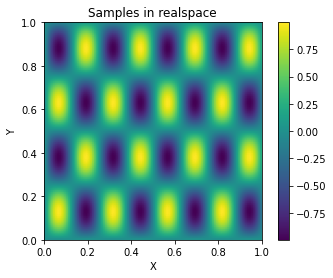

In [22]:
plt.imshow(samples,origin="lower",extent=(0,1,0,1))
plt.colorbar()
plt.title("Samples in realspace")
plt.xlabel("X")
plt.ylabel("Y")

Next, compute the two-dimensional Fourier transform, $\tilde{\rho}$. You can compute this using the function `np.fft.fft2` for two-dimensional transforms, or the more general `np.fft.fftn` for transforms in arbitrary dimensions. You should look at the documentation for these functions. Plot the absolute value of the transformed field using `imshow()`; you should see the Fourier transform is non-zero at four places.

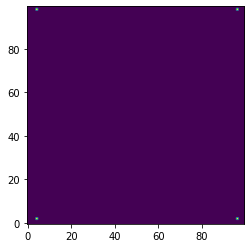

In [29]:
fourierTransform=np.fft.fft2(samples)
plt.imshow(np.abs(fourierTransform),origin="lower")

We will need to determine the wavevectors (frequencies) associated with each point in this plot, along with the magnitude $|\vec{k}|^2$. This is not as straightforward as in one dimension, where we could use the function `np.fft.fftfreq` to immediately access the desired frequencies.

In two dimensions, this function is still relevant, and returns frequencies corresponding to the appropriate index in the desired dimension. As an example to clarify this statement, the Fourier mode at $\tilde{\rho}[i,j]$ will have a component $k_x$ given by the $i^{\rm th}$ element in the array of frequencies returned by `np.fft.fftfreq`, and $k_y$ will be the $j^{\rm th}$ element. You do not need to shift the frequencies as we saw we could do on the homework.

With this in mind, compute the value of $|\vec{k}|^2$ for each point in the array of $\tilde{\rho}$. As before, you can construct this array procedurally, although you should also think about how to do this using array array slicing and broadcasting. Plot the values of $|\vec{k}|^2$ again using `imshow()`.

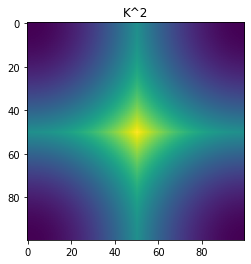

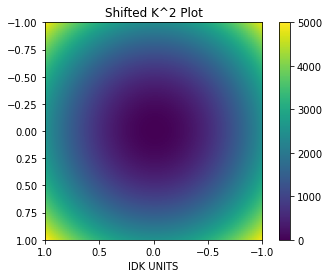

In [47]:
ki=np.fft.fftfreq(N,d=deltaX)
kj=np.fft.fftfreq(N,d=deltaX)
kSquared = np.zeros_like(samples)
for index in np.arange(N):
    kSquared[index] = np.abs(ki[index])**2+np.abs(kj)**2
normKSquared=kSquared/(-4*np.pi)
plt.imshow(kSquared)
plt.title("K^2")
plt.show()
plt.imshow(np.fft.fftshift(kSquared),origin="lower",extent=(1,-1,1,-1))
plt.title("Shifted K^2 Plot")
plt.xlabel("IDK UNITS")
plt.colorbar()

Last, divide the field $\tilde{\rho}$ by $-|2\pi\vec{k}|^2$. We will need to take special care of the point where $|\vec{k}|^2 = 0$: you should identify which point in your array this corresponds to. Choosing this value corresponds to our ability to shift $\phi$ by a constant and have it remain a solution to the Poisson equation. For our case, we will just choose $\tilde{\rho}/|\vec{k}| = 0$ at this point.

Compute the inverse Fourier transform of the resulting array. Examine the result, and note that a small imaginary contribution may be left over which is numerically close to zero. Discard this by computing the real part of the array and plot the result.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Analytic solution comparison

We can obtain $\phi$ analytically for the simple case we are studying here:

$$ \phi(x, y) = - \frac{1}{80\pi^2} \sin(4\pi x) \sin (8\pi y) = - \frac{1}{80\pi^2} \rho(x,y) \,. $$

Confirm your result by comparing to this solution; produce a plot of the difference between the analytic and numerical solutions (i.e. the residual), and include a colorbar legend. What is the maximum absolute error?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Random density distribution

Repeat the above exercise and solve for the potential, but now given a random density field. Initialize an $NxN$ array of Gaussian random numbers for $\rho$. Solve for, and plot, $\phi$.

You should find that "large" features appear more prominent in your result for $\phi$. This can be thought of as the result of dividing by $|\vec{k}|^2$: Fourier mode amplitudes at large $|\vec{k}|$ have considerably decreased in amplitude relative to modes at small $|\vec{k}|$.

Consider what might happens if you divide by some other function of $|\vec{k}|$. Can you think of a function that will enhance or suppress features across a certain range of length scales?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Charge dipole

Repeat the above exercise and solve for the potential, but now choose $\rho$ to be zero everywhere except two points. Set $\rho = 1$ at one point, and $\rho = -1$ at another point. You may choose these points randomly, or as you like.

Does the potential look like you might expect for one positive and one negative point charge?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

--------------
## Optional: Evaluating the Laplacian

In this section of the lab we will explore the accuracy of computing the Laplacian using Fourier transforms, as compared to finite differencing.

In our study of PDEs, we encountered a couple ways to compute finite differences in two dimensions. In a periodic domain, the most succinct way of computing a Laplacian is perhaps to use the `scipy.ndimage.convolve()` function and supply the `mode='wrap'` option. The convolution kernel for the Laplacian can be found in the PDE_Integration notebook. Note that we are using the scipy.ndimage module rather than scipy.signal, as the former contains the `wrap` mode option.

Compute the Laplacian of the potential we used earlier,

$$ \phi(x, y) = - \frac{1}{80\pi^2} \sin(4\pi x) \sin (8\pi y), $$

using Fourier transforms and using finite differencing. Compare the accuracy of the two methods to the exact solution for $\rho$; which one appears more accurate? Why do you think this is? For a Gaussian random field, do you expect, or find, similar behavior?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Member Participation

See Lab 1 for instructions on turning in labs. In the following cell enter the names for each student in the group who partcipated in this lab.